In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from category_encoders import BinaryEncoder

from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv(r"clear_train.csv", index_col=0)
test = pd.read_csv(r"clear_test.csv", index_col=0)

In [3]:
print(train.columns)
print(test.columns)

Index(['PassengerNumber', 'Name', 'HomePlanet', 'Destination', 'deck',
       'numofcabin', 'side', 'Age', 'CryoSleep', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported'],
      dtype='object')
Index(['PassengerNumber', 'Name', 'HomePlanet', 'Destination', 'deck',
       'numofcabin', 'side', 'Age', 'CryoSleep', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')


In [4]:
# Декодирование
def BinaryDecoder(encoded_df, original_df, encoder):
    decoded_df = pd.DataFrame()
    for col in encoder.cols:
        # Получаем количество бинарных столбцов для каждой переменной
        bin_cols = [c for c in encoded_df.columns if c.startswith(col)]
        # Получаем индексы уникальных комбинаций закодированных данных
        unique_binary_values = encoded_df[bin_cols].drop_duplicates().reset_index(drop=True)
        # Сопоставляем их с исходными значениями
        mapping = dict(zip(unique_binary_values.apply(tuple, axis=1), original_df[col].unique()))
        # Применяем декодирование
        decoded_df[col] = encoded_df[bin_cols].apply(lambda row: mapping[tuple(row)], axis=1)
    return decoded_df

In [5]:
#le = LabelEncoder()
#for i in ['deck', 'Name','HomePlanet', 'Destination', 'side']:
#    train[i] = le.fit_transform(train[i])
#    train[i] = le.fit_transform(test[i])
#
#train.head(5)
#test.head(5)

# Сохраняем исходные данные
original_train = train.copy()
original_test = test.copy()
#т.к эти параметры содержат по 2-3 различных значения применим BinaryEncoder
encoder = BinaryEncoder(cols=['HomePlanet', 'Destination', 'side'])

train = encoder.fit_transform(train)
test = encoder.fit_transform(test)
#т.к эти параметры содержат много различных значения применим LabelEncoder
le = LabelEncoder()
for i in ['deck', 'Name']:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])

train.head(5)

,PassengerNumber,Name,HomePlanet_0,HomePlanet_1,Destination_0,Destination_1,deck,numofcabin,side_0,side_1,Age,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,5252,0,1,0,1,1,0,0,1,39,False,False,0,0,0,0,0,False
1,2,4502,1,0,0,1,5,0,1,0,24,False,False,109,9,25,549,44,True
2,3,457,0,1,0,1,0,0,1,0,58,False,True,43,3576,0,6715,49,False
3,3,7149,0,1,0,1,0,0,1,0,33,False,False,0,1283,371,3329,193,False
4,4,8319,1,0,0,1,5,1,1,0,16,False,False,303,70,151,565,2,True


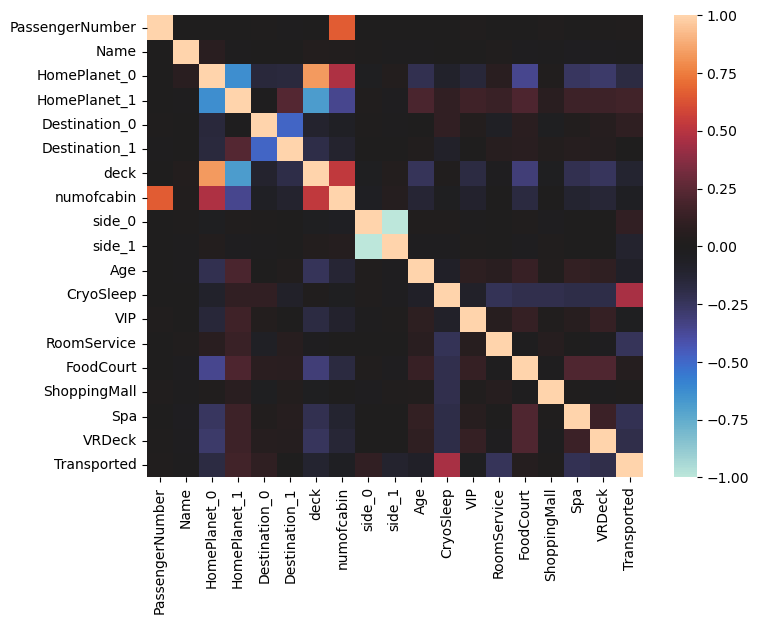

In [6]:
corr = train.corr()
plt.figure(1, figsize=(8, 6)) 
sns.heatmap(corr,center=0) 
plt.show()
#train.corr()

In [7]:
#Сделаем предсказание с помощью линейной регрессии
X_train = train.drop('Transported', axis=1)  
y_train = train['Transported']               

X_test = test

model = LinearRegression()

model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions = np.round(predictions)
predictions = predictions > 0

original_test['Transported'] = predictions
original_test.head(5)

,PassengerNumber,Name,HomePlanet,Destination,deck,numofcabin,side,Age,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,13,Nelly Carsoning,Earth,TRAPPIST-1e,G,3,S,27,True,False,0,0,0,0,0,True
1,18,Lerome Peckers,Earth,TRAPPIST-1e,F,4,S,19,False,False,0,9,0,2823,0,False
2,19,Sabih Unhearfus,Europa,55 Cancri e,C,0,S,31,True,False,0,0,0,0,0,True
3,21,Meratz Caltilter,Europa,TRAPPIST-1e,C,1,S,38,False,False,0,6652,0,181,585,False
4,23,Brence Harperez,Earth,TRAPPIST-1e,F,5,S,20,False,False,10,0,635,0,0,True
